In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/sammamsohail/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Plotting class distributions

In [7]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    fill_mode='nearest')

train_path = 'dataset/'

train_dataset = train_datagen.flow_from_directory(train_path, 
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

test_dataset = train_datagen.flow_from_directory(train_path, 
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 70306 images belonging to 38 classes.
Found 17561 images belonging to 38 classes.


In [8]:
import matplotlib.pyplot as plt

class_indices = train_dataset.class_indices
labels = list(class_indices.keys())

# number of images in each class
train_class_counts = [sum(train_dataset.classes == class_indices[label]) for label in labels]
test_class_counts = [sum(test_dataset.classes == class_indices[label]) for label in labels]

class_counts = {
    'Train': train_class_counts,
    'Test': test_class_counts
}

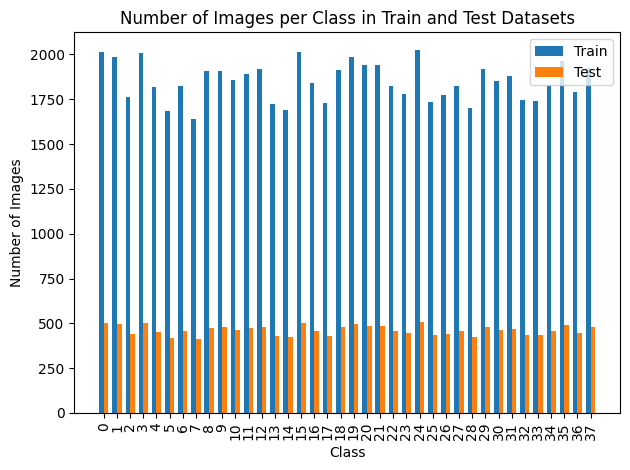

In [9]:
import numpy as np

bar_width = 0.35
index = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots()

# Train dataset histogram
train_bar = ax.bar(index, class_counts['Train'], bar_width, label='Train')

# Test dataset histogram
test_bar = ax.bar(index + bar_width, class_counts['Test'], bar_width, label='Test')

ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images per Class in Train and Test Datasets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index, rotation=90)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()


## Plotting Augmented Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-110.68..117.221].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-113.68..125.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..112.221].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-114.779..138.22101].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..106.061].


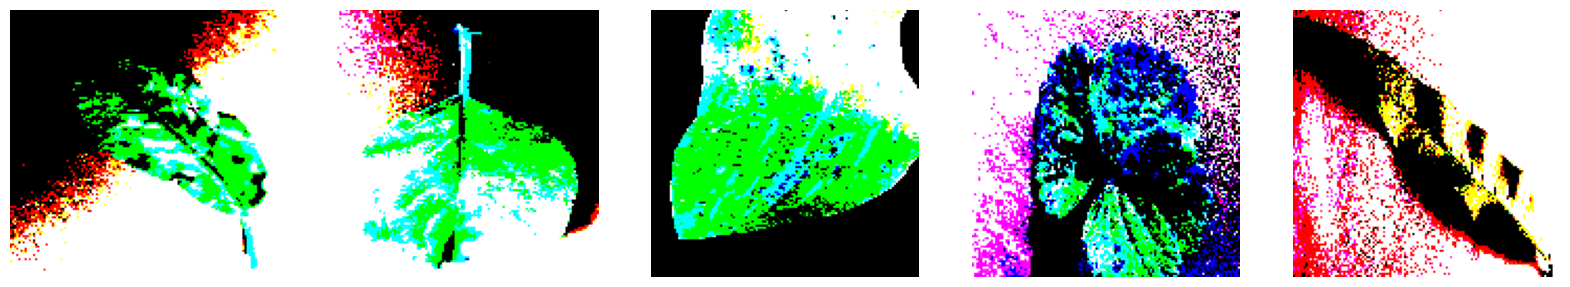

In [10]:
augmented_images, _ = next(train_dataset)

# Plot augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axes[i].imshow(augmented_images[i])
    axes[i].axis('off')
plt.show()